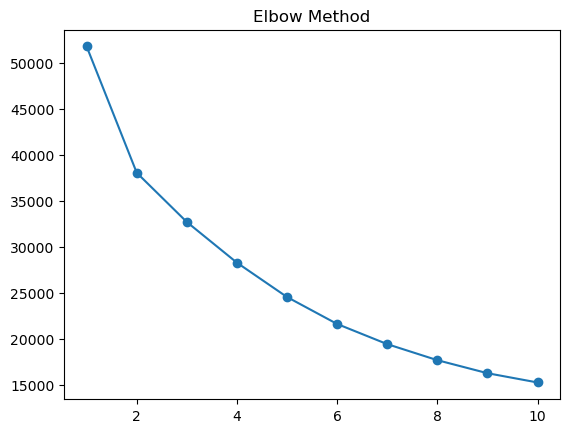

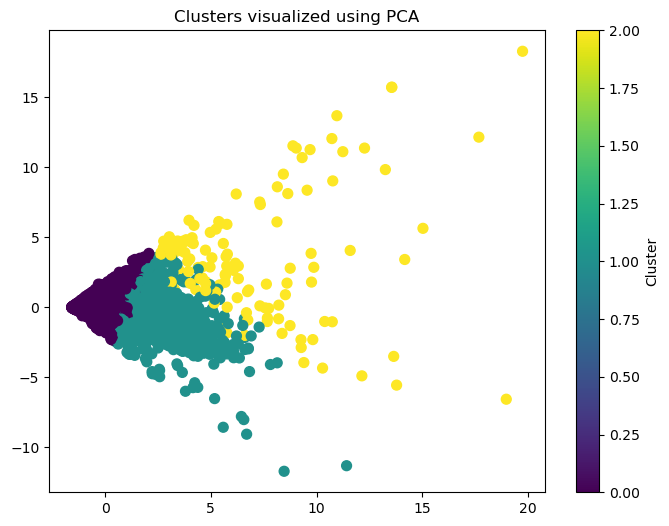


Cluster 0 Examples:


,PURCHASES,CASH_ADVANCE,PAYMENTS,CREDIT_LIMIT,BALANCE,MINIMUM_PAYMENTS,Cluster
0,95.40,0.0,201.802084,1000.0,40.900749,139.509787,0
2,773.17,0.0,622.066742,7500.0,2495.148862,627.284787,0



Cluster 1 Examples:


,PURCHASES,CASH_ADVANCE,PAYMENTS,CREDIT_LIMIT,BALANCE,MINIMUM_PAYMENTS,Cluster
1,0.00,6442.945483,4103.032597,7000.0,3202.467416,1072.340217,1
5,7091.01,0.000000,6354.314328,13500.0,627.260806,198.065894,1



Cluster 2 Examples:


,PURCHASES,CASH_ADVANCE,PAYMENTS,CREDIT_LIMIT,BALANCE,MINIMUM_PAYMENTS,Cluster
38,963.24,6173.682877,20071.07544,7500.0,1411.602230,719.948985,2
64,4523.27,27296.485760,28232.69446,7000.0,2990.422186,1107.030803,2


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('CC GENERAL.csv')

# Select relevant features
features = ['PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'CREDIT_LIMIT', 'BALANCE', 'MINIMUM_PAYMENTS']
X = df[features].dropna().reset_index(drop=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal k using the Elbow Method
e = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    e.append(kmeans.inertia_)

plt.plot(range(1, 11), e, marker='o')
plt.title('Elbow Method')
plt.show()

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit final KMeans with k=3 (from elbow curve)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Clusters visualized using PCA')
plt.colorbar(label='Cluster')
plt.show()

# Add cluster labels to the original data
X_with_clusters = X.copy()
X_with_clusters['Cluster'] = clusters